In [1]:
import pandas as pd 
import re
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

import nltk
nltk.download('sentiwordnet')
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.tag import pos_tag

[nltk_data] Downloading package sentiwordnet to C:\Users\Gi
[nltk_data]     Han\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Gi
[nltk_data]     Han\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Getting nouns and user data

In [2]:
data = pd.read_csv("./train_food_noun.csv")
data2 = pd.read_csv("../Dataset/train_dataset_all.csv")

In [3]:
data.head()

,recipe_id,name,date,review,clean_review,food_noun
0,5315,icy holiday punch,2001-04-24,I brought this to an office holiday party and ...,"['office', 'holiday', 'party']",[]
1,8661,oliveau salad dressing,2001-08-05,Good recipe and easy to make. I found it a li...,"['recipe', 'make', 'bit', 'salad', 'wine', 'di...",[]
2,10859,broccoli cauliflower and rice casserole,2001-08-15,This is a nice casserole. It is very easy to ...,"['casserole', 'put']",[]
3,902,microwaved garlic mushroom rolls,2001-08-16,Very easy to make for a lunch. I served it co...,"['lunch', 'sandwich', 'time', 'cheese', 'chees...","['cheese', 'cheddar']"
4,10722,cherry cream cheese pie,2001-09-04,I like easy and good. I bought the pie shell ...,"['good', 'pie', 'shell', 'whip', 'town', 'guest']",['pie']


In [4]:
user = data2[['user_id','review']]
user.head()

,user_id,review
0,8629,I brought this to an office holiday party and ...
1,13483,Good recipe and easy to make. I found it a li...
2,8629,This is a nice casserole. It is very easy to ...
3,13483,Very easy to make for a lunch. I served it co...
4,13483,I like easy and good. I bought the pie shell ...


### Creating similarity matrix dataframe using Wu & Palmer

In [5]:
# change noun review to list
def str_to_list(text):
    text = text[1:len(text)-1]
    text_list = text.split(',')
    text_list = [text.strip()[1:-1] for text in text_list]
    return text_list

In [7]:
word_in_wordnet = []
# for w in data['food_noun']: -> remove and rerun
for w in data['noun_review']:
    list_ = str_to_list(w)
    for word in list_:
        try:
            w1 = wn.synsets(word)[0]
            if word not in word_in_wordnet:
                word_in_wordnet.append(word)
        except:
            continue

In [8]:
similarity_matrix = []
for word1 in word_in_wordnet:
    row = []
    for word2 in word_in_wordnet:
        w1 = wn.synsets(str(word1))[0]
        w2 = wn.synsets(str(word2))[0]
        if w1.wup_similarity(w2) == 1:
            row.append(1)
        else:
            row.append(1-w1.wup_similarity(w2))
    similarity_matrix.append(row)

In [9]:
similarity_matrix_df = pd.DataFrame(similarity_matrix,columns = word_in_wordnet,index=word_in_wordnet)

In [10]:
similarity_matrix_df

,cheese,cheddar,pie,stuff,desert,side,rice,corn,salmon,fish,...,cockle,taffy,lug,brood,establishment,atom,genoise,dock,julienne,haul
cheese,0.125000,0.733333,0.285714,0.454545,0.714286,0.666667,0.250000,0.789474,0.789474,0.764706,...,0.285714,0.444444,0.875000,0.833333,0.875000,0.454545,0.285714,0.733333,0.285714,0.857143
cheddar,0.733333,1.000000,0.764706,0.714286,0.294118,0.466667,0.764706,0.727273,0.727273,0.700000,...,0.764706,0.789474,0.894737,0.866667,0.894737,0.714286,0.764706,0.666667,0.764706,0.882353
pie,0.285714,0.764706,1.000000,0.538462,0.750000,0.714286,0.625000,0.809524,0.809524,0.789474,...,0.375000,0.666667,0.888889,0.857143,0.888889,0.538462,0.250000,0.764706,0.375000,0.875000
stuff,0.454545,0.714286,0.538462,1.000000,0.666667,0.636364,0.538462,0.777778,0.777778,0.750000,...,0.538462,0.600000,0.750000,0.666667,0.750000,0.333333,0.538462,0.714286,0.538462,0.714286
desert,0.714286,0.294118,0.750000,0.666667,0.125000,0.428571,0.750000,0.714286,0.714286,0.684211,...,0.750000,0.777778,0.750000,0.500000,0.750000,0.666667,0.750000,0.647059,0.750000,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
atom,0.454545,0.714286,0.538462,0.333333,0.666667,0.636364,0.538462,0.777778,0.777778,0.750000,...,0.538462,0.600000,0.750000,0.666667,0.750000,1.000000,0.538462,0.714286,0.538462,0.714286
genoise,0.285714,0.764706,0.250000,0.538462,0.750000,0.714286,0.625000,0.809524,0.809524,0.789474,...,0.375000,0.666667,0.888889,0.857143,0.888889,0.538462,1.000000,0.764706,0.375000,0.875000
dock,0.733333,0.666667,0.764706,0.714286,0.647059,0.600000,0.764706,0.636364,0.636364,0.600000,...,0.764706,0.789474,0.894737,0.866667,0.894737,0.714286,0.764706,1.000000,0.764706,0.882353
julienne,0.285714,0.764706,0.375000,0.538462,0.750000,0.714286,0.625000,0.809524,0.809524,0.789474,...,0.375000,0.666667,0.888889,0.857143,0.888889,0.538462,0.375000,0.764706,1.000000,0.875000


### Using Dendogram to determine the number of clusters

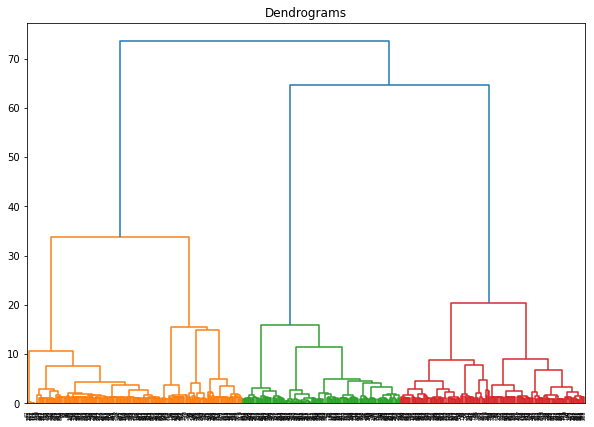

In [11]:
# Dendogram for Heirarchical Clustering
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(similarity_matrix_df, method='ward'))

In [12]:
model = AgglomerativeClustering(n_clusters=15, affinity='euclidean', linkage='ward')
model.fit(similarity_matrix_df)
labels = model.labels_

In [15]:
X = similarity_matrix_df

In [16]:
X['cluster_'] = labels

In [17]:
X

,cheese,cheddar,pie,stuff,desert,side,rice,corn,salmon,fish,...,taffy,lug,brood,establishment,atom,genoise,dock,julienne,haul,cluster_
cheese,0.125000,0.733333,0.285714,0.454545,0.714286,0.666667,0.250000,0.789474,0.789474,0.764706,...,0.444444,0.875000,0.833333,0.875000,0.454545,0.285714,0.733333,0.285714,0.857143,13
cheddar,0.733333,1.000000,0.764706,0.714286,0.294118,0.466667,0.764706,0.727273,0.727273,0.700000,...,0.789474,0.894737,0.866667,0.894737,0.714286,0.764706,0.666667,0.764706,0.882353,2
pie,0.285714,0.764706,1.000000,0.538462,0.750000,0.714286,0.625000,0.809524,0.809524,0.789474,...,0.666667,0.888889,0.857143,0.888889,0.538462,0.250000,0.764706,0.375000,0.875000,4
stuff,0.454545,0.714286,0.538462,1.000000,0.666667,0.636364,0.538462,0.777778,0.777778,0.750000,...,0.600000,0.750000,0.666667,0.750000,0.333333,0.538462,0.714286,0.538462,0.714286,6
desert,0.714286,0.294118,0.750000,0.666667,0.125000,0.428571,0.750000,0.714286,0.714286,0.684211,...,0.777778,0.750000,0.500000,0.750000,0.666667,0.750000,0.647059,0.750000,0.714286,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
atom,0.454545,0.714286,0.538462,0.333333,0.666667,0.636364,0.538462,0.777778,0.777778,0.750000,...,0.600000,0.750000,0.666667,0.750000,1.000000,0.538462,0.714286,0.538462,0.714286,6
genoise,0.285714,0.764706,0.250000,0.538462,0.750000,0.714286,0.625000,0.809524,0.809524,0.789474,...,0.666667,0.888889,0.857143,0.888889,0.538462,1.000000,0.764706,0.375000,0.875000,4
dock,0.733333,0.666667,0.764706,0.714286,0.647059,0.600000,0.764706,0.636364,0.636364,0.600000,...,0.789474,0.894737,0.866667,0.894737,0.714286,0.764706,1.000000,0.764706,0.882353,5
julienne,0.285714,0.764706,0.375000,0.538462,0.750000,0.714286,0.625000,0.809524,0.809524,0.789474,...,0.666667,0.888889,0.857143,0.888889,0.538462,0.375000,0.764706,1.000000,0.875000,4


### Creating a dictionary of clusters containing words

In [18]:
n_cluster = 15
dict = {}
for i in range(n_cluster):
    dict[i] = X[X['cluster_']==i].index.tolist()
print(dict)

{0: ['notch', 'tender', 'proof', 'malt', 'slice', 'dip', 'cut', 'stock', 'saw', 'print', 'catch', 'leave', 'cube', 'smell', 'list', 'check', 'scale', 'scent', 'date', 'bounce', 'mint', 'drop', 'spring', 'fig', 'keep', 'lead', 'go', 'heart', 'scallop', 'french', 'pink', 'salute', 'drumstick', 'preserve', 'picking', 'rim', 'give', 'mold', 'index', 'club', 'press', 'return', 'theme', 'pack', 'let', 'ticket', 'line', 'slash', 'control', 'incision', 'stamp', 'offset', 'bind', 'foam', 'printout', 'detail', 'special', 'fund', 'coral', 'trace', 'stint', 'nick', 'staff', 'blank', 'trim', 'hob', 'bail', 'nightcap', 'puzzle', 'litter', 'nip', 'chatter', 'ante', 'intrigue', 'confirmation', 'distance', 'gloss', 'lug', 'brood'], 1: ['rice', 'chocolate', 'pasta', 'marzipan', 'feed', 'lasagna', 'spaghetti', 'barley', 'fudge', 'butterscotch', 'pickle', 'coal', 'patty', 'jam', 'marshmallow', 'caramel', 'pastry', 'praline', 'cure', 'brittle', 'bonbon', 'fondant', 'slop', 'spill', 'fuel', 'couscous', 'can

In [19]:
X.groupby(['cluster_']).count()

,cheese,cheddar,pie,stuff,desert,side,rice,corn,salmon,fish,...,cockle,taffy,lug,brood,establishment,atom,genoise,dock,julienne,haul
cluster_,,,,,,,,,,,,,,,,,,,,,
0,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
1,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
2,14,14,14,14,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
3,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19
4,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,89
5,57,57,57,57,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
6,25,25,25,25,25,25,25,25,25,25,...,25,25,25,25,25,25,25,25,25,25
7,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
8,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


In [20]:
user['processed_review']  = user['review'].map(lambda x: re.sub("[^A-Za-z0-9]+"," ", x))

C:\Users\Gi Han\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
user['cluster_'] = ''

C:\Users\Gi Han\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Assigning users to the clusters that they belong to

In [22]:
for i, r in user.iterrows():
    review = r['processed_review']
    review_list = review.lower().split()
    unique_words = set(review_list)     # remove repeated noun
    for w in unique_words:
        for k,v in dict.items():
            if w in v:
                if len(user['cluster_'].iloc[i]) == 0:
                    user['cluster_'].iloc[i] = [k]
                elif k not in user['cluster_'].iloc[i]:
                    user['cluster_'].iloc[i].append(k)

C:\Users\Gi Han\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Gi Han\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


### Determining the sentiments of the users for each review

In [23]:
user['sentiment'] = 0

C:\Users\Gi Han\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
for i, r in user.iterrows():
    review = r['processed_review']
    review_list = review.lower().split()
    unique_words = set(review_list)     # remove repeated noun
    sentiment = 0
    for w in unique_words:
        synsets = wn.synsets(w, pos=wn.NOUN)
        if not synsets:
                continue
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
    user['sentiment'].iloc[i] = sentiment

C:\Users\Gi Han\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


### Calculating the average sentiment for each user for different clusters

In [25]:
for i in range(n_cluster):
    user[f'sentiment_c{i}'] = np.NaN
user.head()

C:\Users\Gi Han\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,review,processed_review,cluster_,sentiment,sentiment_c0,sentiment_c1,sentiment_c2,sentiment_c3,sentiment_c4,sentiment_c5,sentiment_c6,sentiment_c7,sentiment_c8,sentiment_c9,sentiment_c10,sentiment_c11,sentiment_c12,sentiment_c13,sentiment_c14
0,8629,I brought this to an office holiday party and ...,I brought this to an office holiday party and ...,,-0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13483,Good recipe and easy to make. I found it a li...,Good recipe and easy to make I found it a litt...,,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8629,This is a nice casserole. It is very easy to ...,This is a nice casserole It is very easy to pu...,,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13483,Very easy to make for a lunch. I served it co...,Very easy to make for a lunch I served it cold...,"[13, 2]",0.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13483,I like easy and good. I bought the pie shell ...,I like easy and good I bought the pie shell an...,[4],0.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
for i, r in user.iterrows():
    for c in r['cluster_']:
        user[f'sentiment_c{c}'].iloc[i] = r['sentiment']

C:\Users\Gi Han\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
user_sentiment_avg = user.groupby(['user_id']).mean()

In [28]:
test = user_sentiment_avg.merge(user,on='user_id')

In [29]:
test.head()

,user_id,sentiment_x,sentiment_c0_x,sentiment_c1_x,sentiment_c2_x,sentiment_c3_x,sentiment_c4_x,sentiment_c5_x,sentiment_c6_x,sentiment_c7_x,...,sentiment_c5_y,sentiment_c6_y,sentiment_c7_y,sentiment_c8_y,sentiment_c9_y,sentiment_c10_y,sentiment_c11_y,sentiment_c12_y,sentiment_c13_y,sentiment_c14_y
0,1535,0.538034,0.525246,0.47449,0.396226,0.670833,0.596,0.644737,0.678125,0.446429,...,1.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1535,0.538034,0.525246,0.47449,0.396226,0.670833,0.596,0.644737,0.678125,0.446429,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1535,0.538034,0.525246,0.47449,0.396226,0.670833,0.596,0.644737,0.678125,0.446429,...,2.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
3,1535,0.538034,0.525246,0.47449,0.396226,0.670833,0.596,0.644737,0.678125,0.446429,...,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1535,0.538034,0.525246,0.47449,0.396226,0.670833,0.596,0.644737,0.678125,0.446429,...,0.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
test.columns

Index(['user_id', 'sentiment_x', 'sentiment_c0_x', 'sentiment_c1_x',
       'sentiment_c2_x', 'sentiment_c3_x', 'sentiment_c4_x', 'sentiment_c5_x',
       'sentiment_c6_x', 'sentiment_c7_x', 'sentiment_c8_x', 'sentiment_c9_x',
       'sentiment_c10_x', 'sentiment_c11_x', 'sentiment_c12_x',
       'sentiment_c13_x', 'sentiment_c14_x', 'review', 'processed_review',
       'cluster_', 'sentiment_y', 'sentiment_c0_y', 'sentiment_c1_y',
       'sentiment_c2_y', 'sentiment_c3_y', 'sentiment_c4_y', 'sentiment_c5_y',
       'sentiment_c6_y', 'sentiment_c7_y', 'sentiment_c8_y', 'sentiment_c9_y',
       'sentiment_c10_y', 'sentiment_c11_y', 'sentiment_c12_y',
       'sentiment_c13_y', 'sentiment_c14_y'],
      dtype='object')

In [32]:
final = test[['user_id','sentiment_c0_x','sentiment_c1_x','sentiment_c2_x','sentiment_c3_x','sentiment_c4_x', 'sentiment_c5_x',
       'sentiment_c6_x', 'sentiment_c7_x', 'sentiment_c8_x', 'sentiment_c9_x',
       'sentiment_c10_x', 'sentiment_c11_x', 'sentiment_c12_x',
       'sentiment_c13_x', 'sentiment_c14_x', 'review','processed_review','cluster_']]

In [33]:
final.head()

,user_id,sentiment_c0_x,sentiment_c1_x,sentiment_c2_x,sentiment_c3_x,sentiment_c4_x,sentiment_c5_x,sentiment_c6_x,sentiment_c7_x,sentiment_c8_x,sentiment_c9_x,sentiment_c10_x,sentiment_c11_x,sentiment_c12_x,sentiment_c13_x,sentiment_c14_x,review,processed_review,cluster_
0,1535,0.525246,0.47449,0.396226,0.670833,0.596,0.644737,0.678125,0.446429,0.760417,0.388889,0.427966,0.559524,0.677778,0.535,0.277778,I make this cake all the time and love it. We ...,I make this cake all the time and love it We u...,"[5, 4]"
1,1535,0.525246,0.47449,0.396226,0.670833,0.596,0.644737,0.678125,0.446429,0.760417,0.388889,0.427966,0.559524,0.677778,0.535,0.277778,Very good. I made it as a coffeecake (9-inch s...,Very good I made it as a coffeecake 9 inch sq ...,[4]
2,1535,0.525246,0.47449,0.396226,0.670833,0.596,0.644737,0.678125,0.446429,0.760417,0.388889,0.427966,0.559524,0.677778,0.535,0.277778,I make these muffins a lot as we love them. I ...,I make these muffins a lot as we love them I u...,"[5, 13]"
3,1535,0.525246,0.47449,0.396226,0.670833,0.596,0.644737,0.678125,0.446429,0.760417,0.388889,0.427966,0.559524,0.677778,0.535,0.277778,Love them!! A quick & easy recipe with ingredi...,Love them A quick easy recipe with ingredients...,"[0, 5]"
4,1535,0.525246,0.47449,0.396226,0.670833,0.596,0.644737,0.678125,0.446429,0.760417,0.388889,0.427966,0.559524,0.677778,0.535,0.277778,This cake ended up looking different that I ex...,This cake ended up looking different that I ex...,"[0, 5]"


In [34]:
final.to_csv('semantic_analysis_food_noun.csv',index=False)

### Save cluster words to csv   

In [63]:
dict_series = pd.Series(dict)
cluster_word_df = pd.Series.to_frame(dict_series, name = 'cluster words')
cluster_word_df

,cluster words
0,"[notch, tender, proof, malt, slice, dip, cut, ..."
1,"[rice, chocolate, pasta, marzipan, feed, lasag..."
2,"[cheddar, desert, side, bottom, top, port, ten..."
3,"[chip, heat, liver, mouth, result, freeze, puf..."
4,"[pie, noodle, vegetable, linguine, pork, meat,..."
5,"[cake, store, bar, bed, machine, computer, amb..."
6,"[stuff, salt, water, filling, dust, rind, pape..."
7,"[fish, eater, brit, mushroom, tart, lamb, shri..."
8,"[pour, sing, bring, refrigerate, specify, deve..."
9,"[apple, berry, avocado, pear, citrus, melon, g..."


In [67]:
cluster_word_df['cluster'] = cluster_word_df.index
cluster_word_df

,cluster words,cluster
0,"[notch, tender, proof, malt, slice, dip, cut, ...",0
1,"[rice, chocolate, pasta, marzipan, feed, lasag...",1
2,"[cheddar, desert, side, bottom, top, port, ten...",2
3,"[chip, heat, liver, mouth, result, freeze, puf...",3
4,"[pie, noodle, vegetable, linguine, pork, meat,...",4
5,"[cake, store, bar, bed, machine, computer, amb...",5
6,"[stuff, salt, water, filling, dust, rind, pape...",6
7,"[fish, eater, brit, mushroom, tart, lamb, shri...",7
8,"[pour, sing, bring, refrigerate, specify, deve...",8
9,"[apple, berry, avocado, pear, citrus, melon, g...",9


In [69]:
cluster_word_df.to_csv('semantic_analysis_cluster_word.csv', index=False)